# Bank Marketing Classification

## Imports

In [1]:
import numpy as np
import pandas as pd # To read the file
import seaborn as sns
import matplotlib.pyplot as plt
# Enabling inline plotting for Matplotlib in Jupyter Notebook (To display graphs in cells)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore # To handle outliers (In the preprocessing part)
from sklearn.preprocessing import LabelEncoder # Label Encoding process (In the preprocessing part)
from sklearn.preprocessing import FunctionTransformer # Transformation process (In the preprocessing part)
from sklearn.preprocessing import StandardScaler # Feature Scaling process (In the preprocessing part)

## Loading the dataset

In [2]:
csv_file_path ="bank-additional.csv" # Local path of the .csv file

data = pd.read_csv(csv_file_path, sep=';') # Loading the data set into the "data" variable by seperating w.r.t ';'

In [3]:
data.head() # Displaying the first 5 rows of the file to check if the file loaded without an error

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Analyzing the dataset before the preprocessing

In [4]:
# Finding unique values for each column and storing in the variable "unique_values"
unique_values = data.nunique()

# Displaying the unique values to examine dataset
unique_values

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

In [5]:
# Checking for null values and their counts
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# Checking for duplicate values
data.duplicated().any()

False

### Analyzing some of the columns' distribution (To determine if they need transformations)

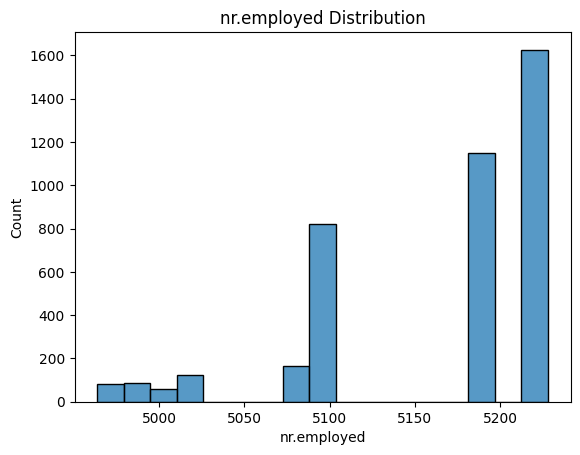

In [7]:
sns.histplot(x = data["nr.employed"])
plt.title("nr.employed Distribution")
plt.show()

# We can clearly see that "nr.employed" column has positively skewed distribution. (Concentration on larger values)

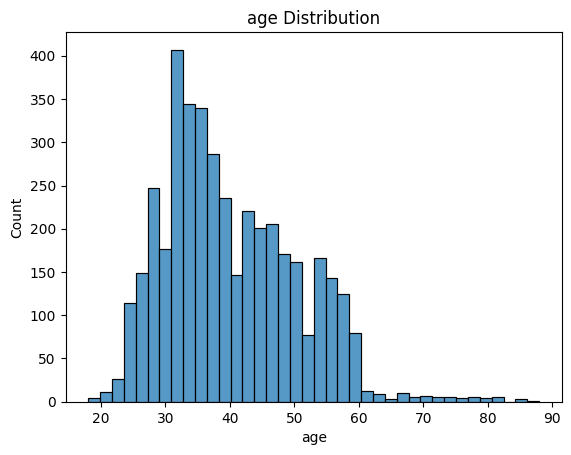

In [8]:
sns.histplot(x = data["age"])
plt.title("age Distribution")
plt.show()

# We can clearly see that "age" column has negatively skewed distribution. (Concentration on smaller values)

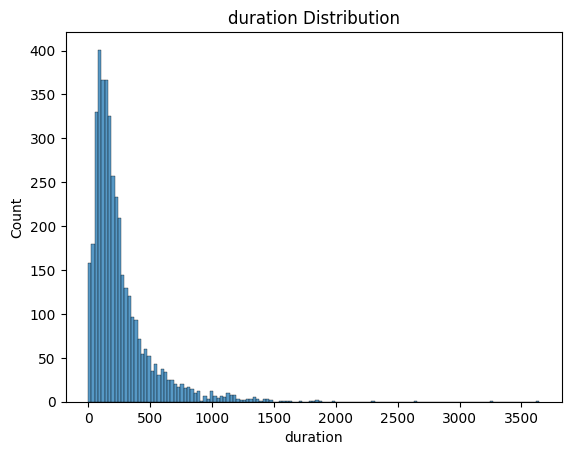

In [9]:
sns.histplot(x = data["duration"])
plt.title("duration Distribution")
plt.show()

# We can clearly see that "duration" column has negatively skewed distribution. (Concentration on smaller values)

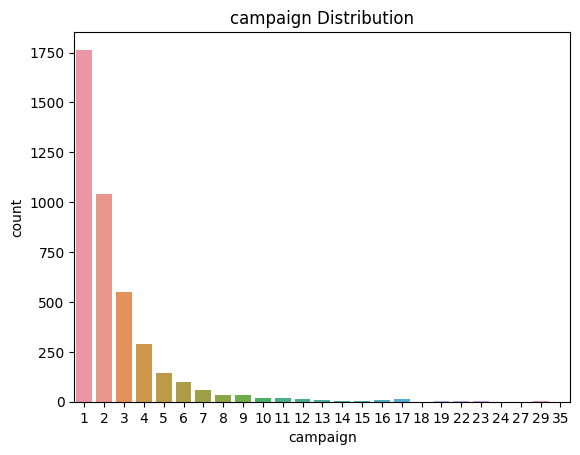

In [10]:
sns.countplot(x = data["campaign"])
plt.title("campaign Distribution")
plt.show()

# We can clearly see that "campaign" column has negatively skewed distribution. (Concentration on smaller values)

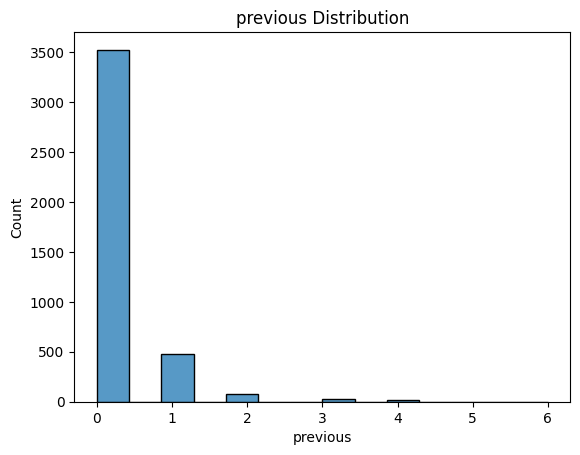

In [11]:
sns.histplot(x = data["previous"])
plt.title("previous Distribution")
plt.show()

# We can clearly see that "previous" column has negatively skewed distribution. (Concentration on smaller values)

## Preprocessing the dataset

### Seperating the categorical and numeric columns into the variables "categorical_cols" and "numeric_cols"

In [12]:
categorical_cols = ['job', 'marital', 'education', 'default','contact','housing', 'loan', 'month', 'day_of_week', 'poutcome', "y"]
numeric_cols = [col for col in data.columns if col not in categorical_cols]

print("Categorical Columns: " + str(categorical_cols))
print("\nNumeric Columns: " + str(numeric_cols))

Categorical Columns: ['job', 'marital', 'education', 'default', 'contact', 'housing', 'loan', 'month', 'day_of_week', 'poutcome', 'y']

Numeric Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Finding the outliers on the dataset by Interquartile Method and changing them to upper limit value for that column

In [13]:
### !!!!!
numeric_cols.remove("previous") # Causes error on correlation matrix?

for column in numeric_cols:
    # Calculating quartiles and interquartile range
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR # Determining the upper limit

    data.loc[data[column] > upper_limit, column] = upper_limit # Replace outliers with the upper limit


# z score method (Not in use because it changes all of the values no matter the threshold value. There may be an implementation mistake.)
"""
z_score_treshold = 2 # Generally chosen as 2 (Same outlier count found for the threshold 3)

for column in numeric_cols:
    z_scores = zscore(data[column]) # Calculating the z score for the column
    outliers = (z_scores > z_score_treshold) | (z_scores < z_score_treshold) # Determining outliers by comparing with the threshold
    column_outlier_count = outliers.sum() # "outliers" is boolen array, so we count the "True" values in the array
    print("Outlier count for the column " + column + " is " + str(column_outlier_count) + ".")
    data.loc[outliers, column] = data[column].median() # If an outlier found, change it by the median of that column
"""

'\nz_score_treshold = 2 # Generally chosen as 2 (Same outlier count found for the threshold 3)\n\nfor column in numeric_cols:\n    z_scores = zscore(data[column]) # Calculating the z score for the column\n    outliers = (z_scores > z_score_treshold) | (z_scores < z_score_treshold) # Determining outliers by comparing with the threshold\n    column_outlier_count = outliers.sum() # "outliers" is boolen array, so we count the "True" values in the array\n    print("Outlier count for the column " + column + " is " + str(column_outlier_count) + ".")\n    data.loc[outliers, column] = data[column].median() # If an outlier found, change it by the median of that column\n'

### Label Encoding for categorical values

In [14]:
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

data.head() # Printing the data to observe the change (For example, for month column, may got the value 6 and jun got the value 4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39.0,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25.0,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38.0,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47.0,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


### Transformation w.r.t analysis on the distributions.

In [15]:
logarithm_transformer = FunctionTransformer(np.log1p, validate=True) # Log transform instance from the Function Transformer
exp_transformer = FunctionTransformer(lambda x:x**2, validate=True) # x² transform instance from the Function Transformer (Manually)

#Applying log transforms for the negatively skewed columns.
columns = ['age', 'duration', 'campaign', 'previous'] # Determined by analyzing the distributions of the columns

negatively_skewed = logarithm_transformer.transform(data[columns])
data['age'] = negatively_skewed[:, 0]
data['duration'] = negatively_skewed[:, 1]
data['campaign'] = negatively_skewed[:, 2]
data['previous'] = negatively_skewed[:, 3]

#Applying x² transforms for the negatively skewed columns.
columns = ['nr.employed']# Determined by analyzing the distributions of the columns

positively_skewed = exp_transformer.transform(data[columns])
data['nr.employed'] = positively_skewed[:, 0]

### Feature Scaling

In [16]:
data[numeric_cols] = StandardScaler().fit_transform(data[numeric_cols]) # Automatically scaling the numeric columns with Standard Scaler
data.head() # Displaying the data to visualize the change (For example: campaign, pdays, emp.var.rate, euribor3m)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.034821,1,1,2,0,2,0,0,6,0,...,0.015820,0.201031,0.0,1,-1.206054,-1.185448,-1.241242,-1.331707,-0.922997,0
1,0.015442,7,2,3,0,0,0,1,6,0,...,1.238303,0.201031,0.0,1,0.649441,0.715193,0.892682,0.711698,0.329039,0
2,-1.759565,7,1,3,0,2,0,1,4,4,...,-0.954520,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.773427,0.840822,0
3,-0.088878,7,1,2,0,1,1,1,4,0,...,0.704287,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.771697,0.840822,0
4,0.766684,0,1,6,0,2,0,0,7,1,...,-0.954520,0.201031,0.0,1,-0.118350,-0.655478,-0.326703,0.328632,0.395048,0


## Correlation Matrix

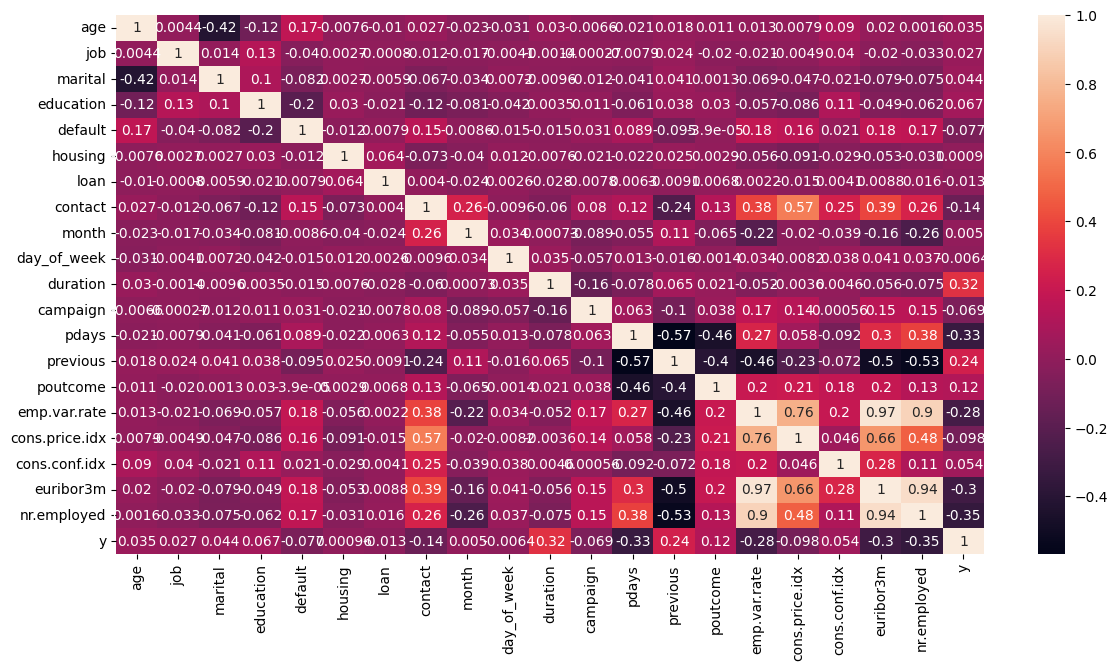

In [17]:
#İleride buradan bir çıkarım yapılmıyorsa silinebilir
corr = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)
plt.show()

## Seperating Input/Output

In [18]:
X = data.drop(["y"], axis = 1)
y = data["y"]


## Model Selection

### Some Steps

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # Computes scores through cross-validation for model performance evaluation.
from sklearn.model_selection import train_test_split # Splits a dataset into training and testing subsets for model assessment.

In [20]:
# Splitting the dataset into training and testing sets.
X_trainv1, X_test, y_trainv1, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # test_size = 0.3 means 30% of the data will be allocated to the test set.

In [21]:

# Function for plotting feature importance.
def plot_feature_importance(model_importance, features, model_name):

    # Create arrays of importance and features.
    feature_importance = np.array(model_importance)
    feature_names = np.array(features)

    # Create DataFrame for storing importance and names.
    data = pd.DataFrame({'features': feature_names, 'importance': feature_importance})


    # Sort by feature importance
    #f_d.sort_values(by=['importance'], ascending=False,inplace=True)

    sorted_indices = np.argsort(-data['importance']) # Calculate indices for sorting in descending order.
    sorted_data = data.iloc[sorted_indices] # Rearrange DataFrame based on sorted indices.

    plt.figure(figsize=(10, 8)) # Modify plot options
    sns.barplot(x=sorted_data['importance'], y=sorted_data['features'])
    plt.title(model_name + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.show()  # Show the plot

In [22]:
# Handling the imbalance in the dataset by oversampling the "yes" samples using SMOTE.
from imblearn.over_sampling import SMOTE

# When there are fewer "yes" samples, the model tends to predict the result as "no" more often,
# resulting in a lower recall rate. SMOTE increases the number of "yes" samples to improve the recall rate.
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_trainv1, y_trainv1)

### Logistic Regression - Hyperparameter Tuning

In [23]:
from sklearn.linear_model import LogisticRegression

# Creating and training a Logistic Regression model
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

y_pred_loreg = model.predict(X_test)

# Evaluating model performance and printing metrics
print("Training score:", np.mean(cross_val_score(model, X_train, y_train))) # Calculating and printing the training score using cross-validation
print("Test score:", np.mean(cross_val_score(model, X_test, y_test))) # Calculating and printing the test score using cross-validation
print( f"Model Score: {model.score(X_test, y_test)}") # Calculating the model score (accuracy) on the test set and printing it
print("\nAccuracy:", accuracy_score(y_test, y_pred_loreg))

Training score: 0.8876386630532972
Test score: 0.9037220843672455
Model Score: 0.8389967637540453

Accuracy: 0.8389967637540453


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from math import sqrt
from sklearn.pipeline import Pipeline

# Initializing the components
scaler = StandardScaler()
log_reg = LogisticRegression()

# Creating a pipeline with steps
steps = [('scaler', scaler), ('logistic_regression', log_reg)]
model = Pipeline(steps)

#model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)
y_pred_loreg = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_loreg))

Training score: 0.8874439214567584
Test score: 0.9037253493535327
Model Score: 0.8389967637540453

Accuracy: 0.8389967637540453


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # Define a list of values to test for the 'C' hyperparameter

param_grid = {'C': c_values} # Create a dictionary with the hyperparameter name 'C' mapped to the list of values

# Define a GridSearchCV object with LogisticRegression as the estimator, specifying hyperparameters and cross-validation
grid = GridSearchCV(LogisticRegression( max_iter=1000000), param_grid, cv=10)

# Fit the grid to the training data to find the best hyperparameters
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'C': 1}


In [26]:
# Initialize a pipeline with StandardScaler and LogisticRegression with C=10
model = make_pipeline(StandardScaler(),LogisticRegression(C=1))

model.fit(X_train, y_train) # Fit the model to the training data
y_pred_loreg = model.predict(X_test) # Predict on the test set

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_loreg))

Training score: 0.8874439214567584
Test score: 0.9037253493535327
Model Score: 0.8389967637540453

Accuracy: 0.8389967637540453


In [27]:
from sklearn.metrics import confusion_matrix

trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(y_test, y_pred_loreg).ravel()

print("TP: " + str(truePositive))
print("TN: " + str(trueNegative))
print("FP: " + str(falsePositive))
print("FN: " + str(falseNegative))
print("")

recall = truePositive / (truePositive + falseNegative) * 100
precision = truePositive / (truePositive + falsePositive) * 100

print("Recall: " + str(recall) + " %")
print("Precision: " + str(precision) + " %")

TP: 100
TN: 937
FP: 168
FN: 31

Recall: 76.33587786259542 %
Precision: 37.3134328358209 %


### Random Forest Classification

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

#Assuming X_train, y_train, X_test, and y_test are your training and test data

#Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred_rf = model.predict(X_test)

#Evaluate the model
train_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))
test_score = accuracy_score(y_test, y_pred_rf)

print("Training accuracy:", train_score)
print("Test accuracy:", test_score)
print(f"Model Score: {model.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))


Training accuracy: 0.9461644083107498
Test accuracy: 0.8923948220064725
Model Score: 0.8923948220064725

Accuracy: 0.8923948220064725


In [29]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)
## try number of iterations so it does not take too long
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'entropy', 'max_leaf_nodes': 350, 'min_samples_split': 4}


In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy", max_leaf_nodes = 100, min_samples_split = 7)

model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))

Training score: 0.9286060951837589
Test score: 0.9102096121196291
Model Score: 0.8737864077669902

Accuracy: 0.8737864077669902


In [31]:
from sklearn.metrics import confusion_matrix

trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(y_test, y_pred_rf).ravel()

print("TP: " + str(truePositive))
print("TN: " + str(trueNegative))
print("FP: " + str(falsePositive))
print("FN: " + str(falseNegative))
print("")

recall = truePositive / (truePositive + falseNegative) * 100
precision = truePositive / (truePositive + falsePositive) * 100

print("Recall: " + str(recall) + " %")
print("Precision: " + str(precision) + " %")

TP: 97
TN: 983
FP: 122
FN: 34

Recall: 74.04580152671755 %
Precision: 44.29223744292237 %


### Support Vector Machine(SVM)

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# SVM model definition
svm_model = SVC(kernel='linear', C=1.0)

# Pipeline creation
model_svm = make_pipeline(StandardScaler(), svm_model)

# Train the model and evaluate performance using cross-validation
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

print("Training score:", np.mean(cross_val_score(model_svm, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model_svm, X_test, y_test)))
print(f"Model Score: {model_svm.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_svm))

Training score: 0.8895898825654923
Test score: 0.9045448609115843
Model Score: 0.8317152103559871

Accuracy: 0.8317152103559871


In [33]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter combinations for cross-validation
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Create Grid Search Cross Validation
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model using Grid Search Cross Validation
grid.fit(X_train_scaled, y_train)

# Find the best parameter combination
best_params = grid.best_params_

# Evaluate the performance on the test set using the best model
best_model = grid.best_estimator_
y_pred_svm = best_model.predict(X_test_scaled)

print("Training score:", np.mean(cross_val_score(best_model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(best_model, X_test, y_test)))
print(f"Model Score: {best_model.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training score: 0.9217791090191604
Test score: 0.9069674807365808
Model Score: 0.8907766990291263

Accuracy: 0.8681229773462783


In [34]:
from sklearn.metrics import confusion_matrix

trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(y_test, y_pred_svm).ravel()

print("TP: " + str(truePositive))
print("TN: " + str(trueNegative))
print("FP: " + str(falsePositive))
print("FN: " + str(falseNegative))
print("")

recall = truePositive / (truePositive + falseNegative) * 100
precision = truePositive / (truePositive + falsePositive) * 100

print("Recall: " + str(recall) + " %")
print("Precision: " + str(precision) + " %")

TP: 66
TN: 1007
FP: 98
FN: 65

Recall: 50.38167938931297 %
Precision: 40.243902439024396 %


### Ridge Classifier

In [35]:
from sklearn.linear_model import RidgeClassifier

# Create a Ridge Classifier model without any hyperparameters
ridgeModel = RidgeClassifier()

# Fit the model on training data
ridgeModel.fit(X_train, y_train)

# Make predictions on test data
y_pred_ridge = ridgeModel.predict(X_test)

# Print training and test scores using cross-validation
print("Training score:", np.mean(cross_val_score(ridgeModel, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(ridgeModel, X_test, y_test)))
print(f"Model Score: {ridgeModel.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_ridge))

Training score: 0.8819805068226121
Test score: 0.9061577641373907
Model Score: 0.8260517799352751

Accuracy: 0.8260517799352751


In [36]:
# Create a Ridge Classifier model with StandardScaler preprocessing
ridgeModel = make_pipeline(StandardScaler(), RidgeClassifier())

# Fit the model on training data
ridgeModel.fit(X_train, y_train)

# Make predictions on test data
y_pred_ridge = ridgeModel.predict(X_test)

# Print training and test scores using cross-validation
print("Training score:", np.mean(cross_val_score(ridgeModel, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(ridgeModel, X_test, y_test)))
print(f"Model Score: {ridgeModel.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_ridge))

Training score: 0.8821756287738316
Test score: 0.9061577641373907
Model Score: 0.8260517799352751

Accuracy: 0.8260517799352751


In [37]:
# Define a list of solvers and a range of alpha values for hyperparameter tuning
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
alpha = np.geomspace(100, 0.01, 5)

# Create a parameter grid for GridSearchCV
param_grid = dict(solver=solvers, alpha=alpha)

# Perform GridSearchCV to find the best hyperparameters
grid = GridSearchCV(RidgeClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best params:{grid.best_params_}")


Best params:{'alpha': 10.0, 'solver': 'lsqr'}


In [38]:
# Create a Ridge Classifier model with StandardScaler preprocessing and the best alpha value
ridgeModel = make_pipeline(StandardScaler(), RidgeClassifier(alpha=10.0, solver='lsqr'))

# Fit the model on training data
ridgeModel.fit(X_train, y_train)

# Make predictions on test data
y_pred_ridge = ridgeModel.predict(X_test)

# Print training and test scores using cross-validation
print("Training score:", np.mean(cross_val_score(ridgeModel, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(ridgeModel, X_test, y_test)))
print(f"Model Score: {ridgeModel.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_ridge))

Training score: 0.8825653021442494
Test score: 0.9053480475382003
Model Score: 0.8244336569579288

Accuracy: 0.8244336569579288


In [39]:
from sklearn.metrics import confusion_matrix

trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(y_test, y_pred_ridge).ravel()

print("TP: " + str(truePositive))
print("TN: " + str(trueNegative))
print("FP: " + str(falsePositive))
print("FN: " + str(falseNegative))
print("")

recall = truePositive / (truePositive + falseNegative) * 100
precision = truePositive / (truePositive + falsePositive) * 100

print("Recall: " + str(recall) + " %")
print("Precision: " + str(precision) + " %")

TP: 105
TN: 914
FP: 191
FN: 26

Recall: 80.1526717557252 %
Precision: 35.47297297297297 %


### XGBoost

In [40]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb))



Training score: 0.9395420529643893
Test score: 0.8948380566801619
Model Score: 0.8818770226537217

Accuracy: 0.8818770226537217


In [41]:
param_grid = {"max_depth":range(1,10) }

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 7}


In [42]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth =7)

model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb))


Training score: 0.9418812342509391
Test score: 0.8883603238866398
Model Score: 0.88915857605178

Accuracy: 0.88915857605178


### Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(y_test, y_pred_xgb).ravel()

print("TP: " + str(truePositive))
print("TN: " + str(trueNegative))
print("FP: " + str(falsePositive))
print("FN: " + str(falseNegative))
print("")

recall = truePositive / (truePositive + falseNegative) * 100
precision = truePositive / (truePositive + falsePositive) * 100

print("Recall: " + str(recall) + " %")
print("Precision: " + str(precision) + " %")

TP: 68
TN: 1031
FP: 74
FN: 63

Recall: 51.908396946564885 %
Precision: 47.88732394366197 %


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1105
           1       0.48      0.52      0.50       131

    accuracy                           0.89      1236
   macro avg       0.71      0.73      0.72      1236
weighted avg       0.89      0.89      0.89      1236

